# Homework #3

**See Canvas for HW #3 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work.

## A. Theoretical Problems

## A.1 Fraud detection

Let $X$ be the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = \frac 19$, for $x \in \{1,...,9\}$. However, there is some empirical evidence that suggests that "naturally occurring" numbers (like numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 


**A.1(a) [10 points] Show that $f(x) = P(X = x)$ is, in fact, a probability mass function (you may use `R` to verify values, but give a proof).**

In [29]:
f_x = function(x){
    log10((x+1)/x)
    }
pmf_rand = 1:9
pmf = f_x(pmf_rand)

cdf = sum(pmf)
cdf
cat("This function is a valid Probability mass function")

[1] 1

This function is a valid Probability mass function

**A.1(b) [6 points] Compute the individual probabilities for $x \in \{1,...,9\}$, and compare them to the corresponding discrete uniform distribution (i.e., $P(X = x) = 1/9$). What do you notice?**

On comparing the values of the individual probabilities of $P(X = x) = \frac 19$, for $x \in \{1,...,9\}$. and $P(X = x) = 1/9$, I notice that the values upto x = 3 is higher than the uniformly distributed values and after that the values decreases below the uniformly distributed value. And In this as the x value increases the pmf value decreases because of the log parameter. So the logarithmic distribution tends to give larger probability values to the smaller numbers and smaller values to larger numbers but in uniform distribution all the pmfs will have the same probability. 

In [30]:
f_x = function(x){
    log10((x+1)/x)
    }
pmf_rand = 1:9
pmf = f_x(pmf_rand)
cat("PMF")
pmf

("Uniform Distribution values")
uniform = rep(1/9,9)
uniform

PMF

[1] 0.30103000 0.17609126 0.12493874 0.09691001 0.07918125 0.06694679 0.05799195
[8] 0.05115252 0.04575749

[1] "Uniform Distribution values"

[1] 0.1111111 0.1111111 0.1111111 0.1111111 0.1111111 0.1111111 0.1111111
[8] 0.1111111 0.1111111

**A.1(c) [10 points] Obtain a formula for the cumulative distribution function (CDF) of $X$ (your formula should not have sigma notation).**

**A.1(d) [6 points] Using the CDF, what is the probability that the leading digit is at most $4$? At least $5$?**

In [31]:
F_x <- function(x) {
  log10(x+1)             
}
at_most_4 <- F_x(4)
at_least_5 <- 1 - at_most_4
cat("P(X <= 4) =", at_most_4)
cat("\n")
cat("P(X >= 5) =", at_least_5)


P(X <= 4) = 0.69897
P(X >= 5) = 0.30103

## A.2

An aircraft seam requires $20$ rivets. The seam will have to be reworked if any
of these rivets is defective. Suppose rivets are defective independently of one
another, each with the same probability.

**A.2(a) [10 points] If $18\%$ of all seams need reworking, what is the probability that a rivet is
defective?**

**A.2(b)[6 points]  How small should the probability of a defective rivet be to ensure that only
$10\%$ of all seams need reworking?**

## A.3 How long will this series take?

Individuals $A$ and $B$ play a sequence of chess games until one player wins $9$ games. $A$ wins an individual game with probability $p$, and $B$ wins a game with probability $1 − p$ (there are no draws). Let $X$ denote the number of games played.

**A.3(a) [4 points] What are the possible values of $X$?**

**A.3(b) [10 points] (*STAT 5000 ONLY*) Write out a mathematical expression for $P(X = x)$.**

**A.3(c) [6 points] (*STAT 5000 ONLY*) Let $p = 0.5$. Find $P(X = 12)$.**

## A.4 Independence of Complementary Events

**[12 points] Assume that $A$ and $B$ are independent events. Show that $A^c$ and $B$ are also independent. (Hint: establish a relationship between $P(A^c \cap B)$, $P(B)$, and $P(A\cap B)$; think about what $P(A \mid B)$ must be given what you know about $A$ and $B$.)**

## B.1 More Fraud Detection

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, some suggest that there is empirical evidence that ``naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

**[20 points] Using `tax.csv`, a dataset containing the taxable incomes for individuals in 1978, decide whether there is any evidence that the dataset is fraudulent.**

Parsed with column specification:
cols(
  taxIncomes = col_double()
)


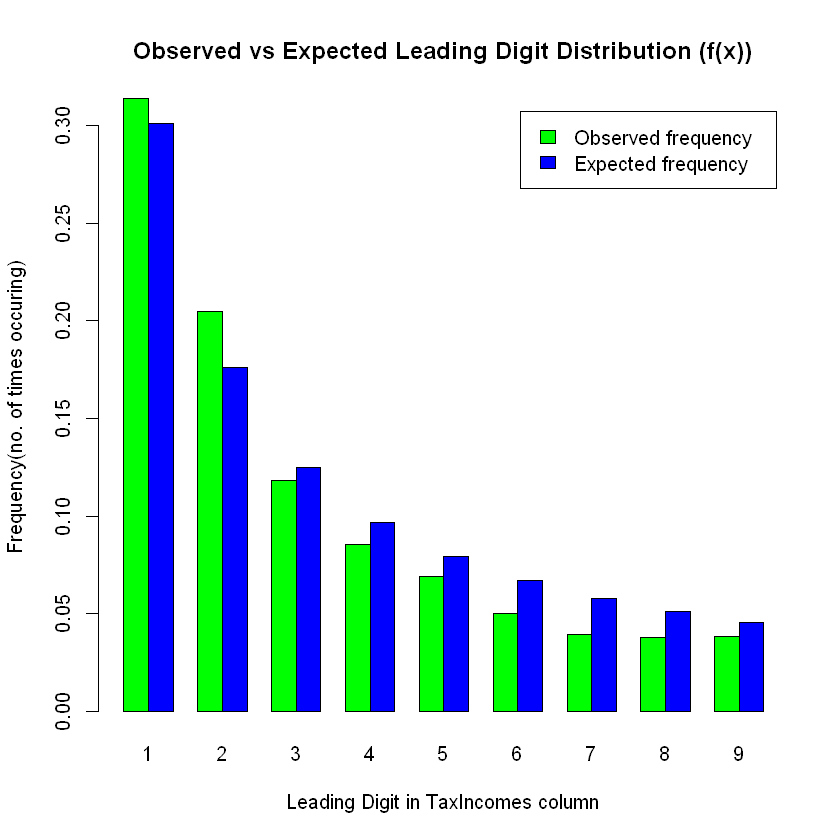

In [34]:
df <- read_csv("tax.csv")
ld <- function(x) {
  as.numeric(substr(as.character(abs(x)), 1, 1))
}
df$ld <- sapply(df$taxIncomes, ld)
f_x <- function(x) {
  log10((x + 1) / x)
}
expected_freq <- f_x(1:9)
observed_freq <- table(factor(df$ld, levels = 1:9)) / nrow(df)

barplot(rbind(observed_freq, expected_freq),
        beside = TRUE,
        col = c("green", "blue"),
        legend = c("Observed frequency", "Expected frequency"),
        main = "Observed vs Expected Leading Digit Distribution (f(x))",
        names.arg = 1:9,
        xlab = "Leading Digit in TaxIncomes column",
        ylab = "Frequency(no. of times occuring)")


Here the leading digits 1-2 occurs more time in this data in the observed frequency, and from 3 to 9 digits occurs more time in the expected frequency compared to the observed frequency. So here we can clearly see a variation in the no. of times occuring. There is no digit which shows the exactly same uniform distribution. As per the concept, the digit which shows exactly same frequency in both observed and expected is the fraudulent accounting fraud. But, here all the digits shows different frequencies in both expected and observed so clearly there is no fraudulent accounting frauds are present in this data. 
